### Simple example of a three axis dataset, linearly separable.

In [70]:
import numpy as np
import pandas as pd

seed = 1234
np.random.seed(seed)

trials = 1
n_samples = 100
# Change this to make it unbalanced
proportion = 0.1

y = np.random.binomial(trials, proportion, n_samples)
x1 = np.random.random(n_samples)
x2 = 0.5 + (-1 + y) * 0.20
x3 = (-1 + y) * 0.80 + x1

data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})
data

,x1,x2,x3,y
0,0.767117,0.3,-0.032883,0
1,0.708115,0.3,-0.091885,0
2,0.796867,0.3,-0.003133,0
3,0.557761,0.3,-0.242239,0
4,0.965837,0.3,0.165837,0
...,...,...,...,...
95,0.369650,0.3,-0.430350,0
96,0.604334,0.3,-0.195666,0
97,0.103104,0.3,-0.696896,0
98,0.802374,0.3,0.002374,0


In [71]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/linear_{n_samples}_{aux}.csv", index=False)

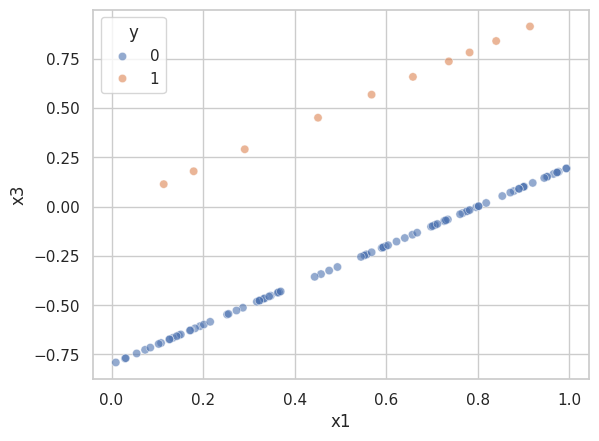

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=data["x1"], y=data["x3"], alpha=0.6, hue=data["y"], palette="deep"
)
plt.show()

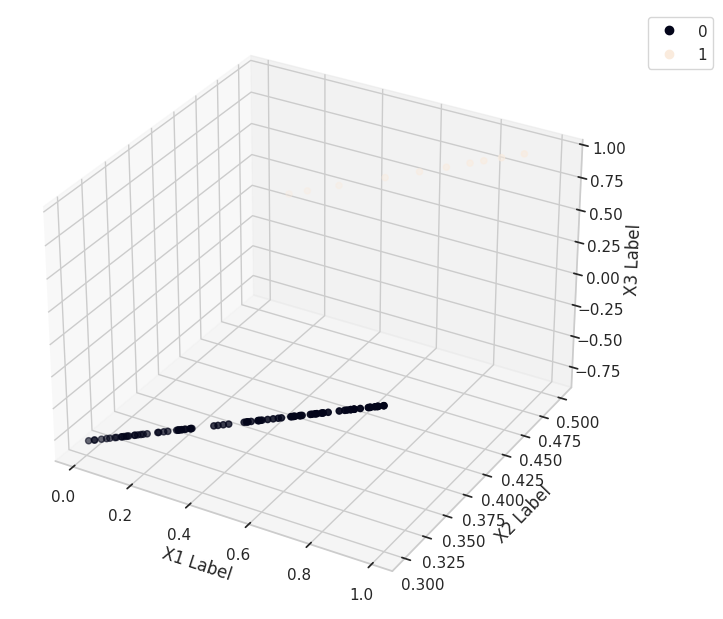

In [73]:
from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data["x1"], data["x2"], data["x3"], c=data["y"])
ax.set_xlabel("X1 Label")
ax.set_ylabel("X2 Label")
ax.set_zlabel("X3 Label")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

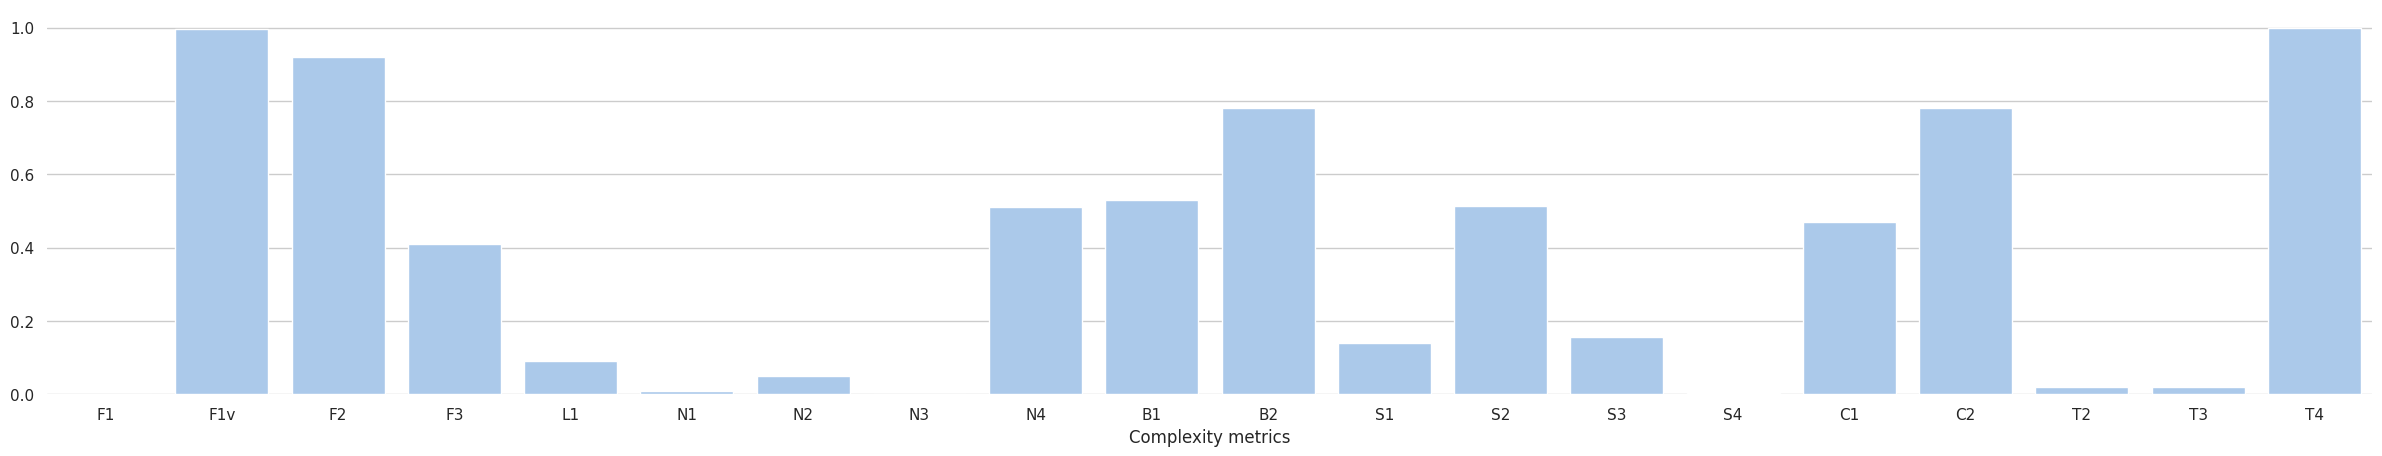

In [74]:
from dcm import ComplexityProfile
from dcm.utils import plot_profile

profile = ComplexityProfile()
profile.fit(data[["x1", "x2"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

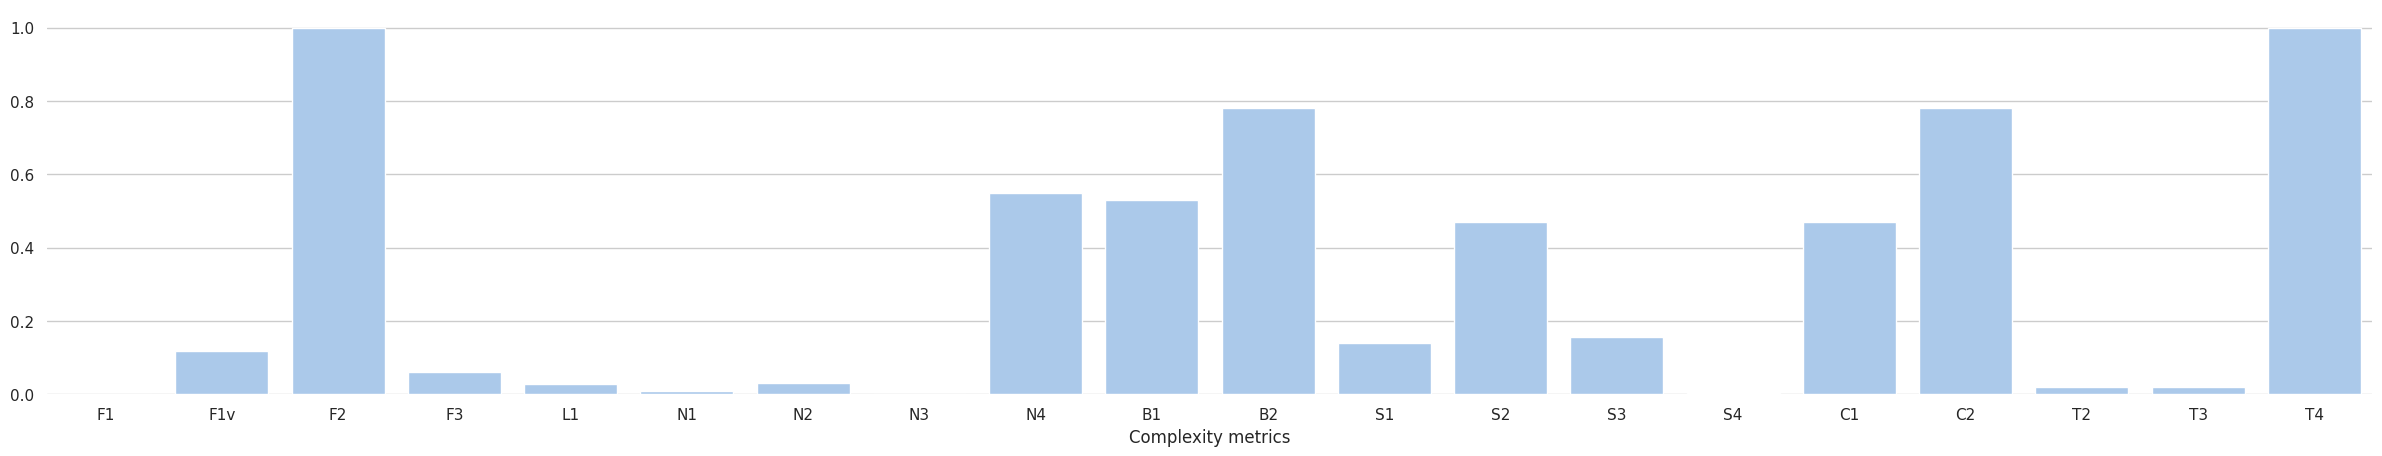

In [75]:
profile = ComplexityProfile()
profile.fit(data[["x2", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

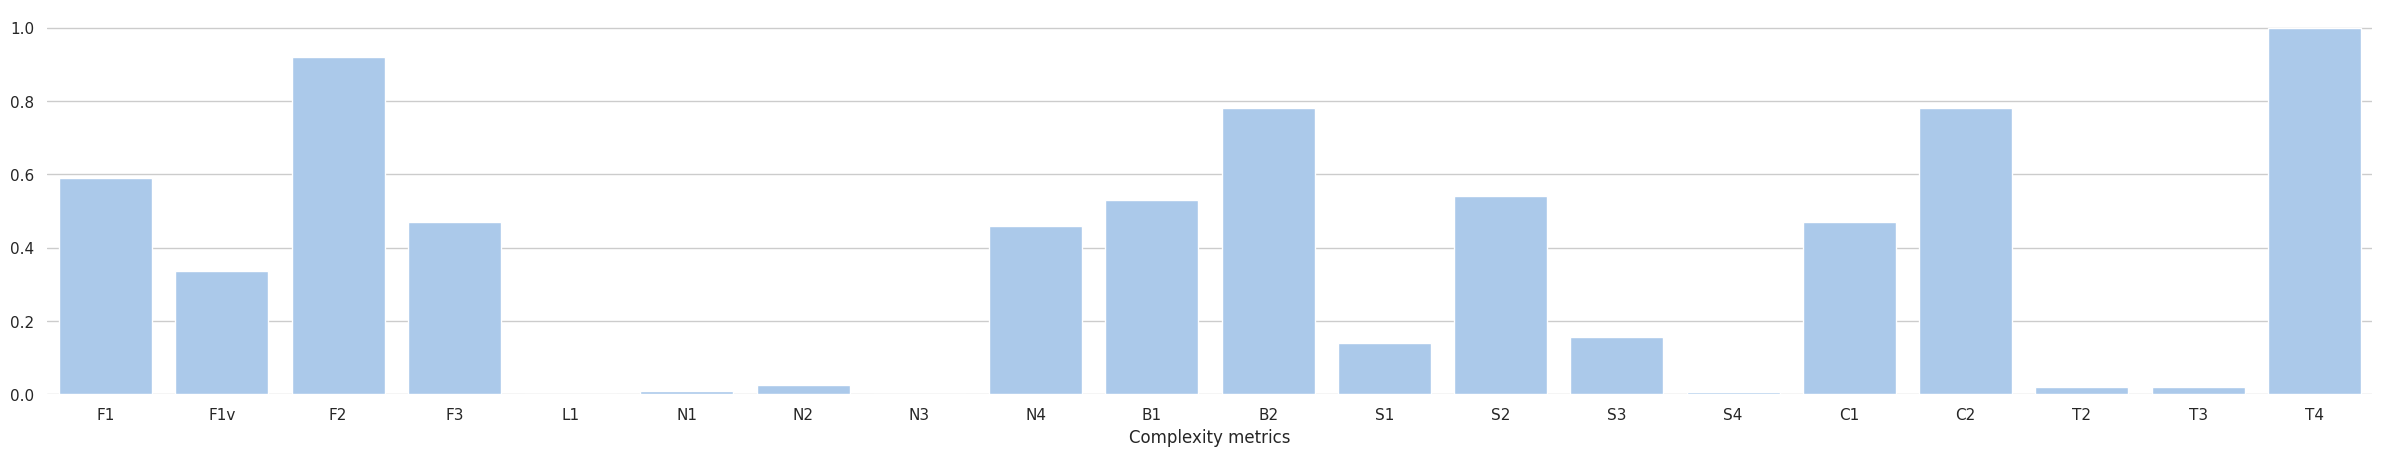

In [76]:
profile = ComplexityProfile()
profile.fit(data[["x1", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## More fuzzy extra axis

In [77]:
np.random.seed(seed)

x2 = 0.75 + y * -1 * np.random.normal(0.5, 0.1, n_samples)
x3 = 2 * np.random.uniform(0.5, 0.1, n_samples)

data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})
data

,x1,x2,x3,y
0,0.767117,0.75,0.278563,0
1,0.708115,0.75,0.434777,0
2,0.796867,0.75,0.418673,0
3,0.557761,0.75,0.279930,0
4,0.965837,0.75,0.376669,0
...,...,...,...,...
95,0.369650,0.75,0.471162,0
96,0.604334,0.75,0.495748,0
97,0.103104,0.75,0.703259,0
98,0.802374,0.75,0.642608,0


In [78]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/fuzzy_{n_samples}_{aux}.csv", index=False)

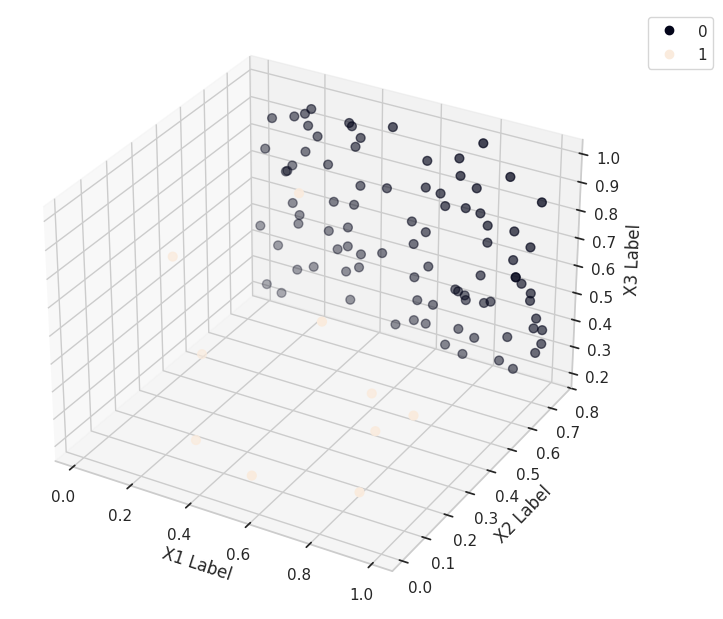

In [79]:
# axes instance
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data["x1"], data["x2"], data["x3"], s=40, c=data["y"])
ax.set_xlabel("X1 Label")
ax.set_ylabel("X2 Label")
ax.set_zlabel("X3 Label")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

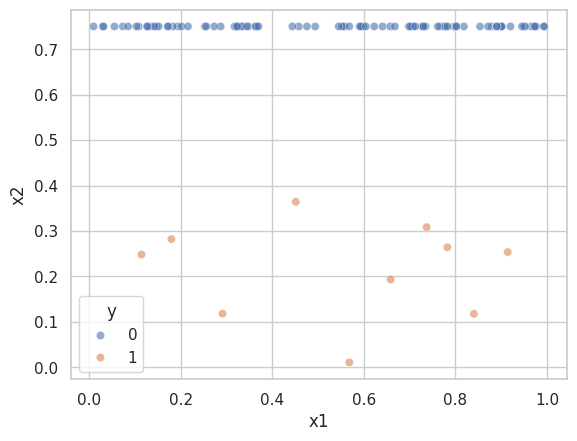

In [80]:
sns.scatterplot(
    x=data["x1"], y=data["x2"], alpha=0.6, hue=data["y"], palette="deep"
)
plt.show()

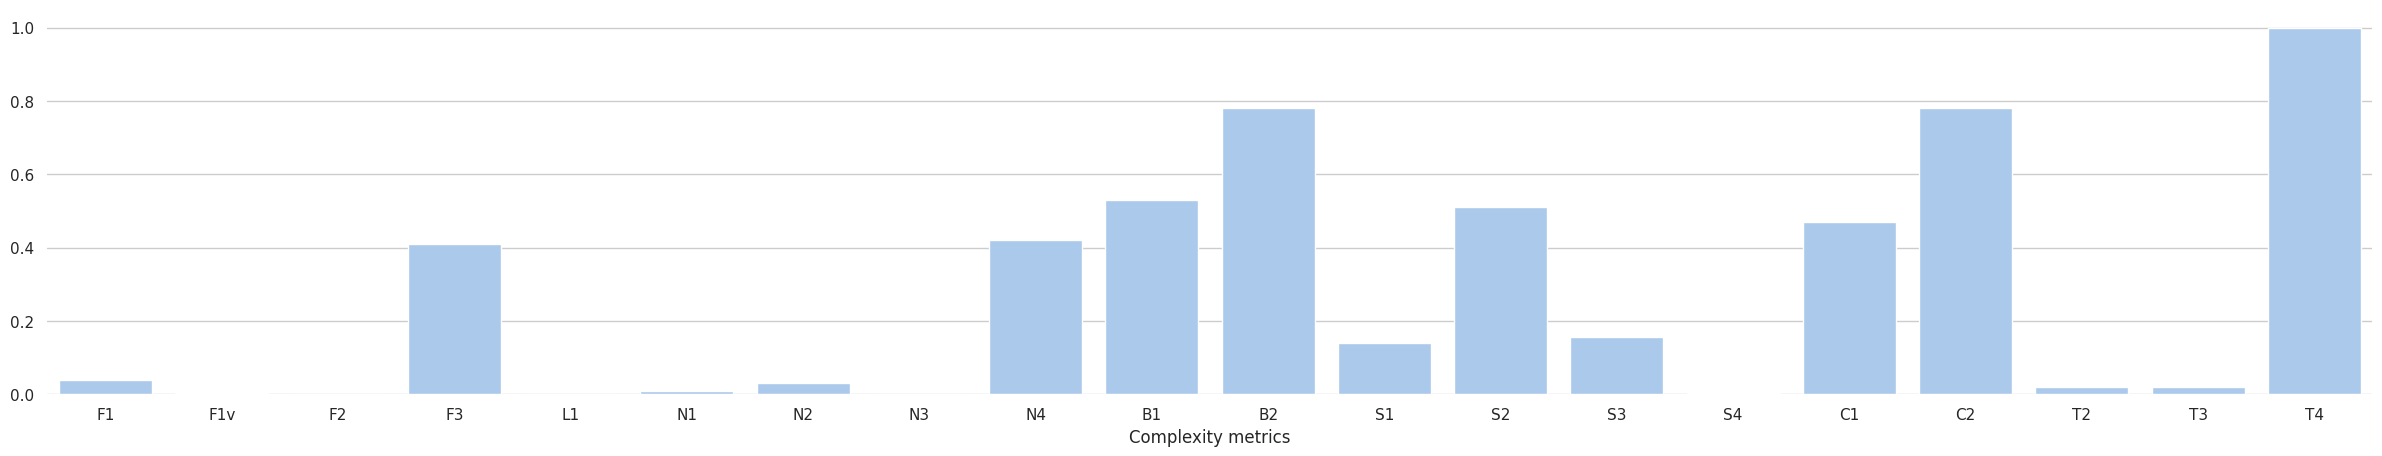

In [81]:
profile = ComplexityProfile()
profile.fit(data[["x1", "x2"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

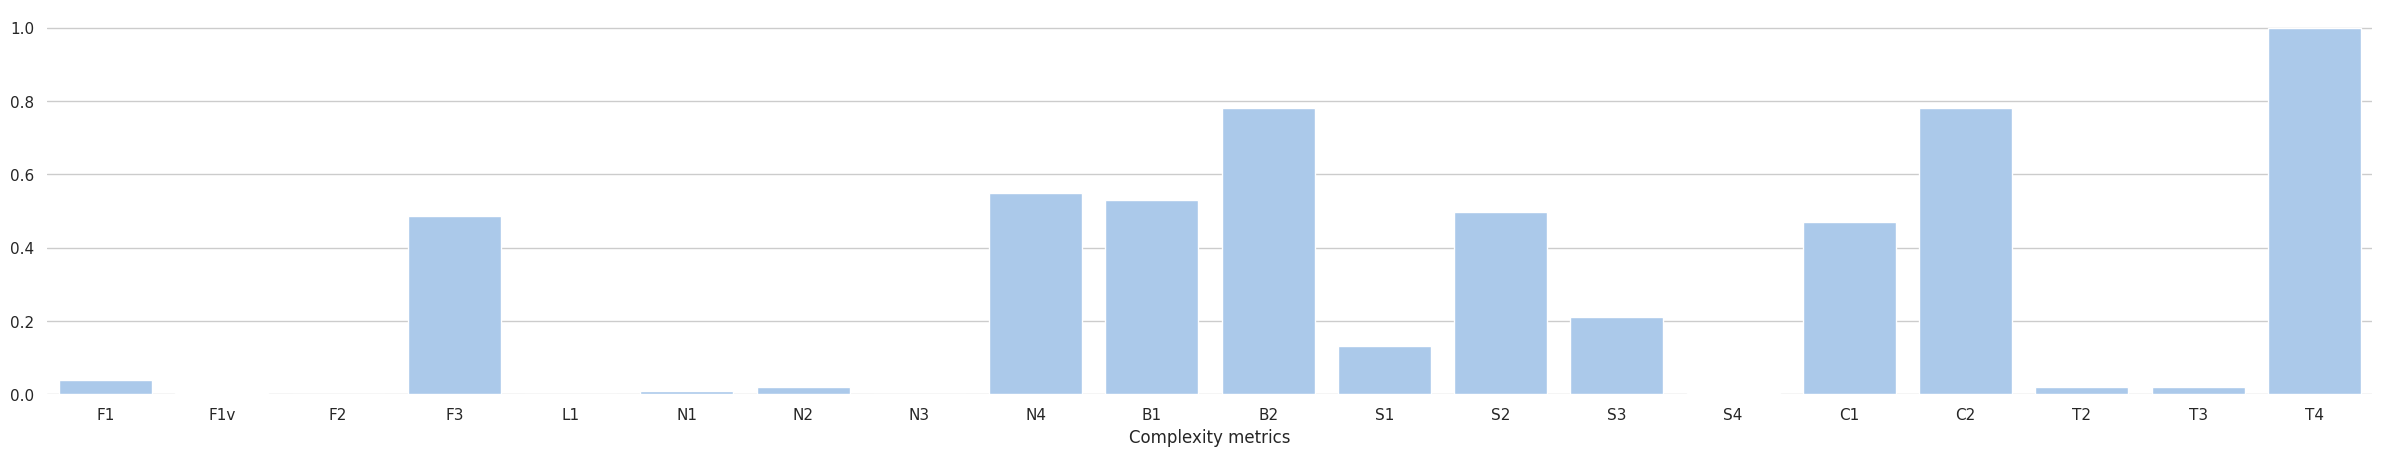

In [82]:
profile = ComplexityProfile()
profile.fit(data[["x2", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## Blobs

In [83]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(
    n_samples=[n_samples, int(n_samples * proportion)],
    n_features=3,
    random_state=seed,
)

x1 = X_blob[:, 0]
x2 = X_blob[:, 1]
x3 = X_blob[:, 2]

y = y_blob

data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})
data

,x1,x2,x3,y
0,-6.648935,2.143159,-0.551342,0
1,-7.880326,1.991410,-0.496281,0
2,-6.226307,3.799973,-2.050279,0
3,3.955466,5.888097,-5.090727,1
4,-5.881234,1.390636,-1.565007,0
...,...,...,...,...
105,4.976138,4.576742,-3.552155,1
106,-7.221239,1.050121,-0.091523,0
107,5.888844,5.874009,-4.480236,1
108,-6.454052,1.176575,0.542534,0


In [84]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/blobs_{n_samples}_{aux}.csv", index=False)

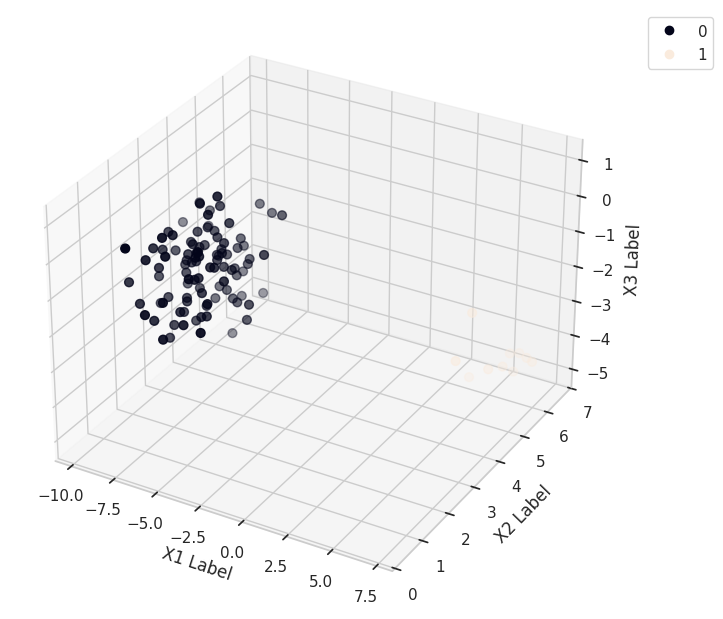

In [85]:
# axes instance
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data["x1"], data["x2"], data["x3"], s=40, c=data["y"])
ax.set_xlabel("X1 Label")
ax.set_ylabel("X2 Label")
ax.set_zlabel("X3 Label")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

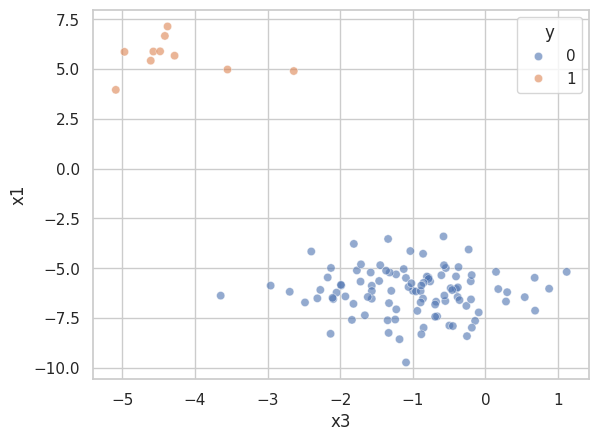

In [86]:
sns.scatterplot(
    x=data["x3"], y=data["x1"], alpha=0.6, hue=data["y"], palette="deep"
)
plt.show()

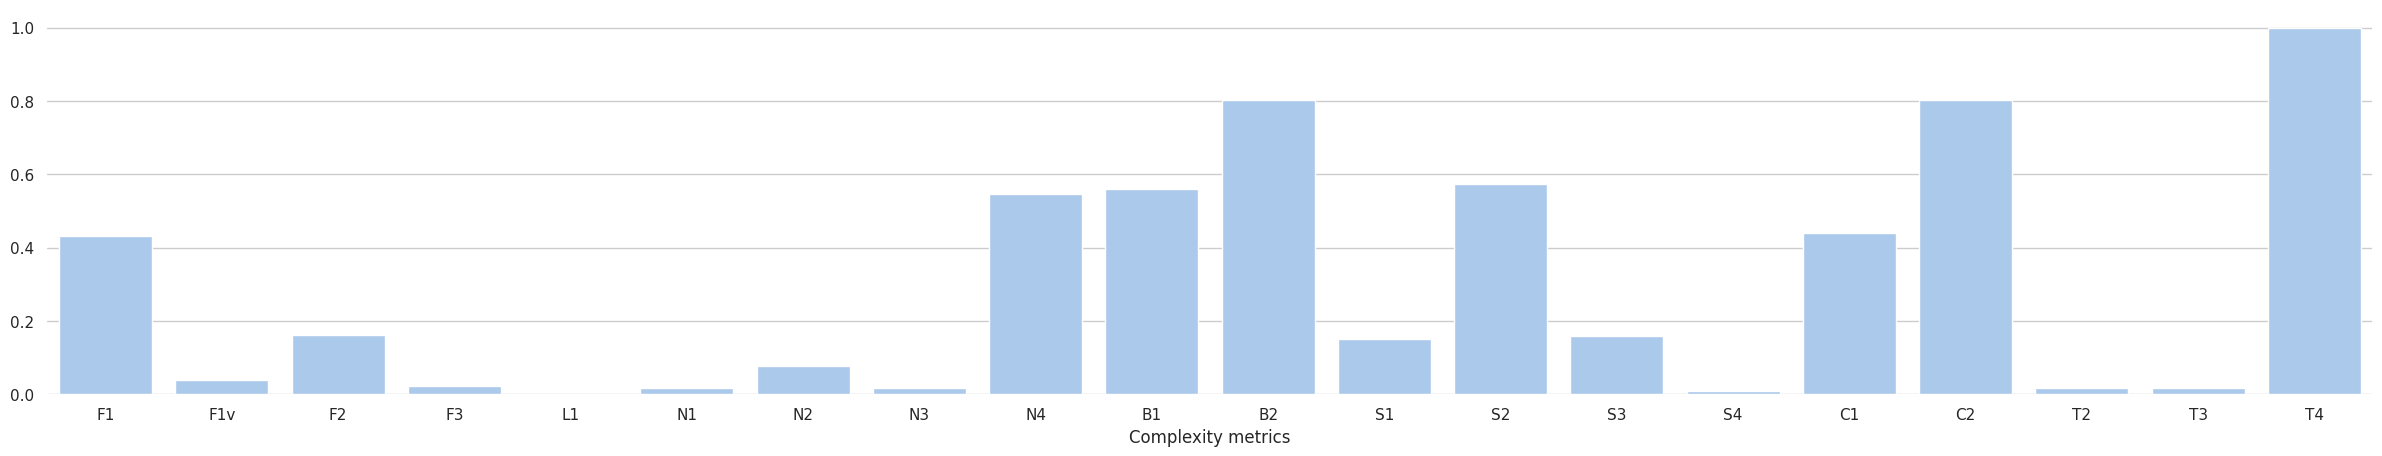

In [87]:
profile = ComplexityProfile()
profile.fit(data[["x2", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

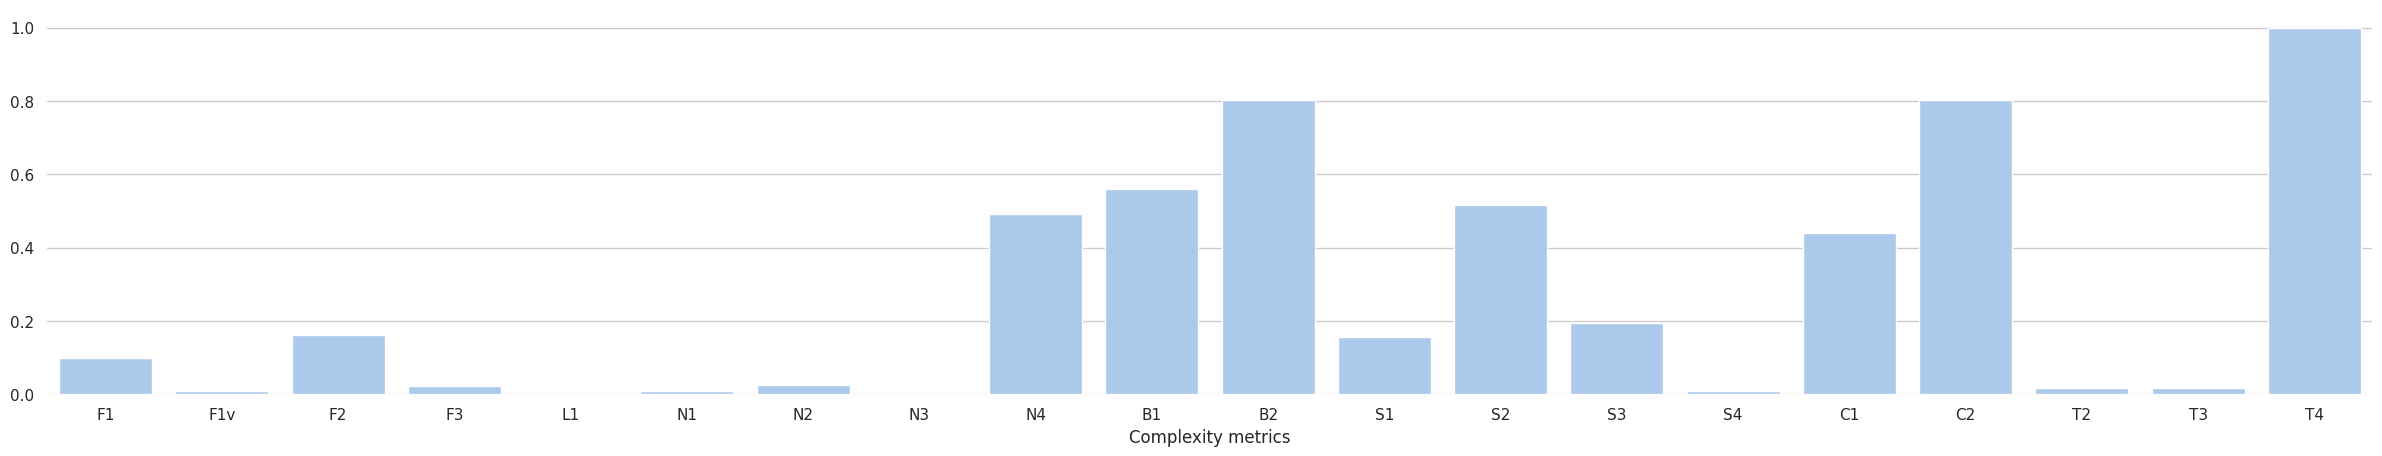

In [88]:
profile = ComplexityProfile()
profile.fit(data[["x1", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## Random samples

In [89]:
np.random.seed(seed)

y = np.random.binomial(trials, proportion, n_samples)
x1 = np.random.random(n_samples)
x2 = np.random.random(n_samples)
x3 = np.random.random(n_samples)

data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})
data

,x1,x2,x3,y
0,0.767117,0.979039,0.285878,0
1,0.708115,0.881232,0.986747,0
2,0.796867,0.627682,0.431801,0
3,0.557761,0.930487,0.574234,0
4,0.965837,0.724790,0.527242,0
...,...,...,...,...
95,0.369650,0.330007,0.846025,0
96,0.604334,0.606675,0.473330,0
97,0.103104,0.822160,0.902555,0
98,0.802374,0.627965,0.225996,0


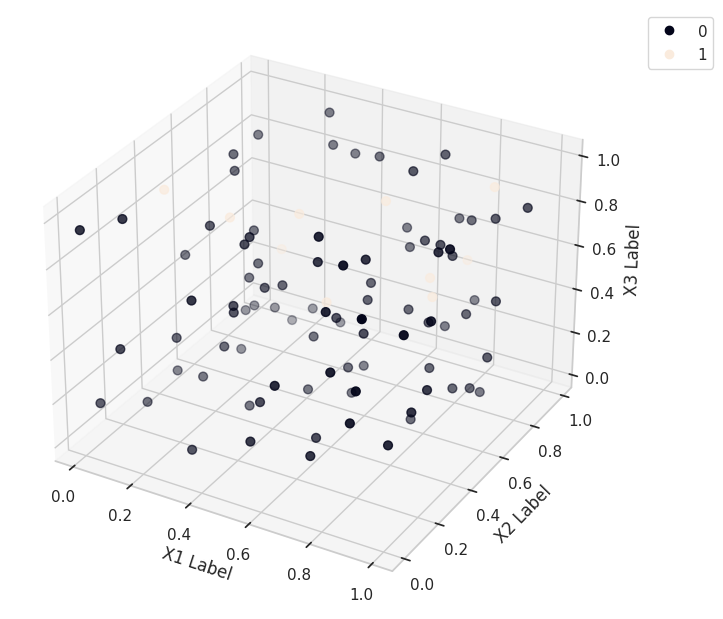

In [90]:
# axes instance
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data["x1"], data["x2"], data["x3"], s=40, c=data["y"])
ax.set_xlabel("X1 Label")
ax.set_ylabel("X2 Label")
ax.set_zlabel("X3 Label")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [91]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/random_{n_samples}_{aux}.csv", index=False)

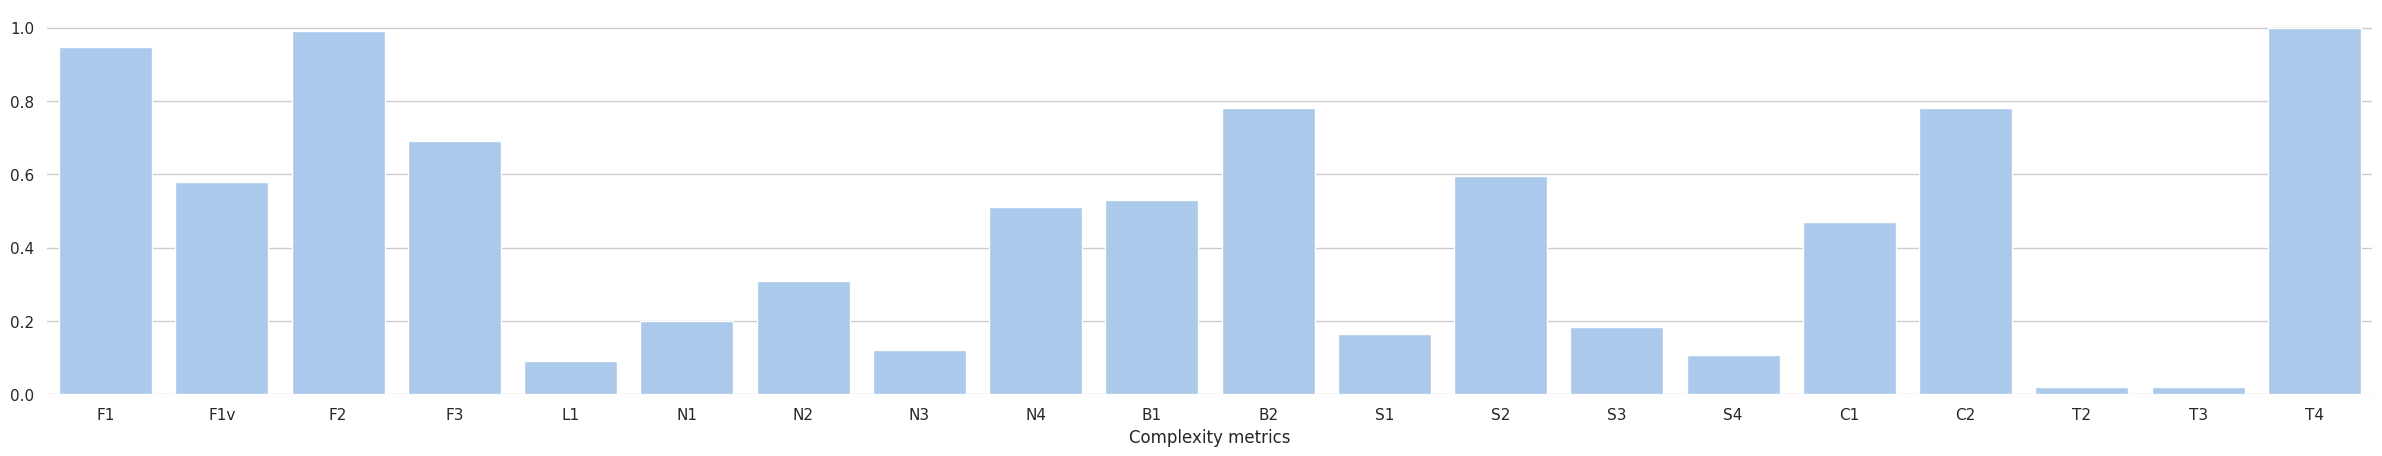

In [92]:
profile = ComplexityProfile()
profile.fit(data[["x2", "x3"]], data["y"])
prof_data = profile.transform()
plot_profile(prof_data)